# Analysis of Remote Entry Level Data Analyst Jobs Descriptions on Indeed.com
## by Yehia El-Balky

This notebook is organized into the following sections: 

- [Introduction](#intro)
- [Part I - Scraping Indeed.com](#Web_Scraping)
- [Part II - Single Tools Analysis](#Singletons)
- [Part III - Pairs of Tools Analysis](#Pairs)
- [Part IIII - Trios of Tools Analysis](#Trios)
- [Part V - Quadruples of Tools Analysis](#Quadruples)
- [Key Takeaways](#Conclusions)


<a id='intro'></a>
## Introduction

For this project, I wanted to analyze all current remote entry level Data Analyst jobs descriptions on Indeed.com (Data was extracted on 3-11-2021) in order to get a glimpse of the most frequent Data Analysis tools required in remote entry level jobs, which is probably the best & easiest choice for anyone interested in gaining some work experience in order to get into the vast field of Data Science.



<a id='Web_Scraping'></a>
## Part I - Scraping Indeed.com

To get started, let's extract the Data we need from Indeed.com.

In [ ]:
# Importing libraries for web scraping
from bs4 import BeautifulSoup
import requests

In [17]:
url = 'https://www.indeed.com/jobs?q="Data%20Analyst"&l=Remote&explvl=entry_level'
response = requests.get(url)
response.status_code

200

In [18]:
# Parsing link's html code
soup = BeautifulSoup(response.text, 'lxml')

#### Getting all jobs urls on first page

In [19]:
links = soup.find_all('a', class_='tapItem')
len(links)

15

In [20]:
jobs_urls = ['https://www.indeed.com' + link.get('href') for link in links]
jobs_urls

['https://www.indeed.com/rc/clk?jk=35a0d3fd5f4f2676&fccid=db130263a2af3230&vjs=3',
 'https://www.indeed.com/company/MercuryGate-International/jobs/Part-Time-Data-Analyst-04cee5da97bac139?fccid=6f1ea647b03f330c&vjs=3',
 'https://www.indeed.com/rc/clk?jk=63ffdb1cc2a8780d&fccid=591be181c58fd89d&vjs=3',
 'https://www.indeed.com/rc/clk?jk=d7447ddaf76ddeab&fccid=3ed0572c448b2368&vjs=3',
 'https://www.indeed.com/rc/clk?jk=19b0c09829ed7f83&fccid=7eef65abf940ce5e&vjs=3',
 'https://www.indeed.com/rc/clk?jk=fecf439a2b4a1e9d&fccid=31deb4e9336f4b27&vjs=3',
 'https://www.indeed.com/company/ZenResolve/jobs/Data-Analyst-bf7854294b5605fe?fccid=76f8e3fb18422bda&vjs=3',
 'https://www.indeed.com/rc/clk?jk=27d5196be1d8b916&fccid=361342c3ae3ac596&vjs=3',
 'https://www.indeed.com/rc/clk?jk=80ec06813c07ebdb&fccid=90cdb9e88c7bf10a&vjs=3',
 'https://www.indeed.com/rc/clk?jk=9e5b1123f64880bb&fccid=dd616958bd9ddc12&vjs=3',
 'https://www.indeed.com/rc/clk?jk=b19cf3db074cf9ed&fccid=b39fb6f124ce8586&vjs=3',
 'https:

#### Getting all jobs urls on all pages

In [21]:
import time

i = 2
while True:
    try:
        url = 'https://www.indeed.com' + soup.find('a', {'aria-label': 'Next'}).get('href') # formula for getting next page's url
    except AttributeError:
        break # breaking when last page is reached
    
    time.sleep(1) # waiting one second before each request to avoid overloading the website with requests
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    links = soup.find_all('a', class_='tapItem')
    print('Page: {}, no. of links scraped: {}'.format(str(i), str(len(links))))
    jobs_urls.extend(['https://www.indeed.com' + link.get('href') for link in links])

    i += 1

len(jobs_urls)
    

Page: 2, no. of links scraped: 15
Page: 3, no. of links scraped: 15
Page: 4, no. of links scraped: 15
Page: 5, no. of links scraped: 15
Page: 6, no. of links scraped: 15
Page: 7, no. of links scraped: 15
Page: 8, no. of links scraped: 15
Page: 9, no. of links scraped: 15
Page: 10, no. of links scraped: 15
Page: 11, no. of links scraped: 15
Page: 12, no. of links scraped: 15
Page: 13, no. of links scraped: 15
Page: 14, no. of links scraped: 15
Page: 15, no. of links scraped: 15
Page: 16, no. of links scraped: 15
Page: 17, no. of links scraped: 15
Page: 18, no. of links scraped: 15
Page: 19, no. of links scraped: 15
Page: 20, no. of links scraped: 15


300

In [22]:
# Checking for duplicates
len(set(jobs_urls))

275

In [23]:
# Removing duplicates
jobs_urls = list(set(jobs_urls))
len(jobs_urls)

275

#### Getting all jobs descriptions

In [24]:
jobs_descriptions = []

for url in jobs_urls:
    time.sleep(1)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    try:
        job_description = soup.find('div', class_='jobsearch-jobDescriptionText').text
    except AttributeError:
        continue
    jobs_descriptions.append(job_description.replace('\n', ''))

len(jobs_descriptions)
    

258

In [25]:
# Sample
jobs_descriptions[10]

'Job Description:You are kind, curious, and enjoy enabling sound data-based decision-making using your combined skills and/or experience in business analytics, data visualization, and data engineering.Maybe you delight in turning technical support data into feedback for product teams, or perhaps you love reducing duplication of effort by developing automated analytics solutions. In any case, you love having ample opportunities to blend your many skillsets in consultation, communication, presentations and data visualization and create insights that inform your organization\'s strategy.You are comfortable engaging directly to global business leaders to understand their objectives and how they can measure key results. You enjoy developing focused action plans after analyzing data in context.You prefer to manage multiple projects simultaneously. You are happy working with a kind, fun, energetic and close-knit, yet distributed team and you appreciate integrity in your colleagues and company

#### Saving all jobs descriptions in a csv file

In [2]:
import pandas as pd

jobs_descriptions_df = pd.DataFrame(jobs_descriptions, columns=['Job Description'])
jobs_descriptions_df


In [111]:
jobs_descriptions_df.to_csv('/Users/yehiaelbalky/Desktop/jobs_descriptions.csv', index=False)

In [3]:
# Code for accessing saved jobs descriptions

jobs_descriptions_df = pd.read_csv('/Users/yehiaelbalky/Desktop/jobs_descriptions.csv')
jobs_descriptions = jobs_descriptions_df.iloc[:,0].tolist()

In [4]:
# List of all Data Analysis tools
tools = ['python', 'excel', 'spark', 'hadoop', 'storm', 'tableau', 'qlikview', 'splunk', 'power bi',
'businessobjects', 'sisence', 'spotfire', 'thoughtspot', 'data studio', 'grafana', 'redash', 'cognos', 'knime',
'looker', 'rapidminer', 'oracle analytics', 'qlik', 'metabase', 'periscope data', 'chartio', 'domo',
'mysql', 'spss', 'talend', 'whatagraph', 'xplenty', 'zoho', 'sprinkle', 'tidami', 'juicebox', 'adverity', 'dataddo',
'hubspot', 'oribi', 'orange', 'openrefine', 'datapine', 'erwin', 'qualtrics', 'highcharts', 'sas', 'monkeylearn',
'airtable', 'clicdata', 'lexalytics', 'nodexl', 'sequentum', 'atlas.ti', 'hdinsight', 'skytree', 'splice', 'samoa',
'lumify', 'elasticsearch', 'hive', 'fine report', 'solvexia', 'data factory', 'mapreduce', 'sagemaker', 'pig']

# Will treat sql & R separetly using regex in order to avoid counting mysql as sql and any word containing R as R.

In [6]:
# Dropping jobs descriptions not mentioning any tool

import re # for sql & R

for description in jobs_descriptions:
    if not (any(tool in description.lower() for tool in tools)\
    or re.search(' [^a-zA-Z]?sql', description.lower()) or re.search(' [^a-zA-Z0-9]?R[^a-zA-Z0-9]? ', description)):
        jobs_descriptions.remove(description)

len(jobs_descriptions)

229

<a id='Singletons'></a>
## Part II - Single Tools Analysis

In [7]:
def initialize_count_dictionary():
    '''Function for initializing a dictionary of tools counts'''

    tools_counts = {}

    for tool in tools:
        tools_counts[tool] = 0
    tools_counts['sql'] = 0
    tools_counts['R'] = 0
    
    return tools_counts

#### Making a dictionary of tools counts

In [14]:
# Initializing the dictionary

tools_counts = initialize_count_dictionary()
tools_counts

{'python': 0,
 'excel': 0,
 'spark': 0,
 'hadoop': 0,
 'storm': 0,
 'tableau': 0,
 'qlikview': 0,
 'splunk': 0,
 'power bi': 0,
 'businessobjects': 0,
 'sisence': 0,
 'spotfire': 0,
 'thoughtspot': 0,
 'data studio': 0,
 'grafana': 0,
 'redash': 0,
 'cognos': 0,
 'knime': 0,
 'looker': 0,
 'rapidminer': 0,
 'oracle analytics': 0,
 'qlik': 0,
 'metabase': 0,
 'periscope data': 0,
 'chartio': 0,
 'domo': 0,
 'mysql': 0,
 'spss': 0,
 'talend': 0,
 'whatagraph': 0,
 'xplenty': 0,
 'zoho': 0,
 'sprinkle': 0,
 'tidami': 0,
 'juicebox': 0,
 'adverity': 0,
 'dataddo': 0,
 'hubspot': 0,
 'oribi': 0,
 'orange': 0,
 'openrefine': 0,
 'datapine': 0,
 'erwin': 0,
 'qualtrics': 0,
 'highcharts': 0,
 'sas': 0,
 'monkeylearn': 0,
 'airtable': 0,
 'clicdata': 0,
 'lexalytics': 0,
 'nodexl': 0,
 'sequentum': 0,
 'atlas.ti': 0,
 'hdinsight': 0,
 'skytree': 0,
 'splice': 0,
 'samoa': 0,
 'lumify': 0,
 'elasticsearch': 0,
 'hive': 0,
 'fine report': 0,
 'solvexia': 0,
 'data factory': 0,
 'mapreduce': 0,
 

In [11]:
def fill_count_dictionary(tools_counts, jobs_descriptions):
    '''Function for filling the dictionary of tools counts'''

    for description in jobs_descriptions:
        for tool in tools:
            if tool in description.lower():
                tools_counts[tool] += 1
        if re.search(' [^a-zA-Z]?sql', description.lower()):
            tools_counts['sql'] += 1
        if re.search(' [^a-zA-Z0-9]?R[^a-zA-Z0-9]? ', description):
            tools_counts['R'] += 1

    return tools_counts

In [9]:
def remove_zero_values_and_sort(tools_counts):
    '''Function for removing keys with 0 values and sorting the dictionary descendingly by its values'''

    tools_counts = {key: value for key, value in tools_counts.items() if value > 0}

    sorted_tools_counts = {}
    sorted_keys = sorted(tools_counts, reverse=True, key=tools_counts.get)
    for w in sorted_keys:
        sorted_tools_counts[w] = tools_counts[w]
    
    return sorted_tools_counts

In [15]:
# Filling the values with the frequency of each tool in the jobs descriptions

tools_counts = fill_count_dictionary(tools_counts, jobs_descriptions)

sorted_tools_counts = remove_zero_values_and_sort(tools_counts)
sorted_tools_counts

{'excel': 184,
 'sql': 137,
 'python': 93,
 'tableau': 75,
 'R': 48,
 'sas': 47,
 'power bi': 34,
 'looker': 14,
 'mysql': 13,
 'qlik': 8,
 'hadoop': 7,
 'data studio': 7,
 'spss': 7,
 'spark': 5,
 'domo': 4,
 'storm': 3,
 'hive': 3,
 'qlikview': 2,
 'splunk': 2,
 'cognos': 2,
 'talend': 2,
 'hubspot': 2,
 'qualtrics': 2,
 'airtable': 2,
 'data factory': 2,
 'orange': 1,
 'elasticsearch': 1,
 'pig': 1}

In [16]:
# Removing tools never appearing in the jobs descriptions
tools = [tool for tool in tools if tools_counts[tool] > 0]
tools

['python',
 'excel',
 'spark',
 'hadoop',
 'storm',
 'tableau',
 'qlikview',
 'splunk',
 'power bi',
 'data studio',
 'cognos',
 'looker',
 'qlik',
 'domo',
 'mysql',
 'spss',
 'talend',
 'hubspot',
 'orange',
 'qualtrics',
 'sas',
 'airtable',
 'elasticsearch',
 'hive',
 'data factory',
 'pig']

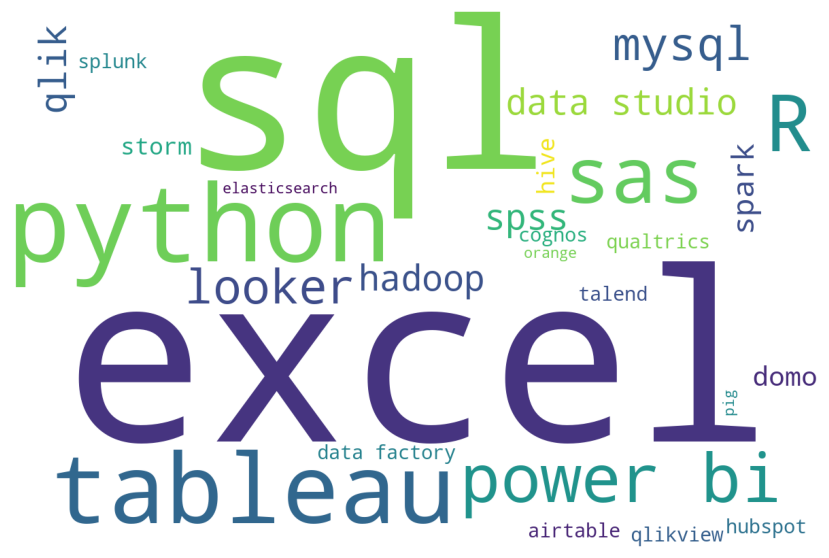

In [11]:
# Plotting word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white", width=1200, height=800).generate_from_frequencies(tools_counts)
plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(wc);

In [17]:
def get_tool_percentages(tools_counts):
    '''Function for converting tools counts to percentages'''

    tools_percentages = {}
    for key in tools_counts.keys():
        tools_percentages[key] = round((tools_counts[key] / len(jobs_descriptions)), 2)

    return tools_percentages

In [18]:
# Converting tools counts topercentages
sorted_tools_percentages = get_tool_percentages(sorted_tools_counts)
sorted_tools_percentages

{'excel': 0.8,
 'sql': 0.6,
 'python': 0.41,
 'tableau': 0.33,
 'R': 0.21,
 'sas': 0.21,
 'power bi': 0.15,
 'looker': 0.06,
 'mysql': 0.06,
 'qlik': 0.03,
 'hadoop': 0.03,
 'data studio': 0.03,
 'spss': 0.03,
 'spark': 0.02,
 'domo': 0.02,
 'storm': 0.01,
 'hive': 0.01,
 'qlikview': 0.01,
 'splunk': 0.01,
 'cognos': 0.01,
 'talend': 0.01,
 'hubspot': 0.01,
 'qualtrics': 0.01,
 'airtable': 0.01,
 'data factory': 0.01,
 'orange': 0.0,
 'elasticsearch': 0.0,
 'pig': 0.0}

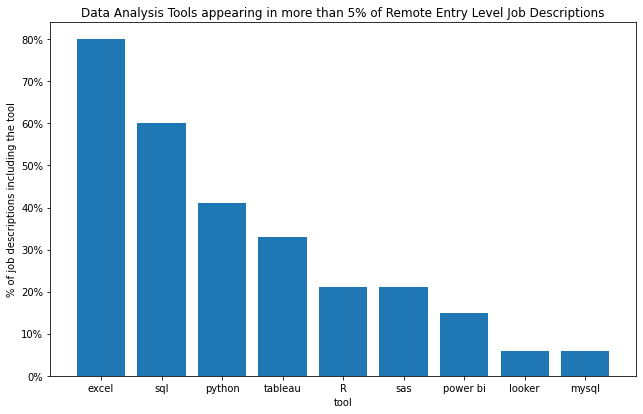

In [14]:
# Plotting tools with frequency higher than 5%

import warnings
warnings.filterwarnings("ignore")

top_tools = {key: value for key, value in sorted_tools_percentages.items() if value > 0.05}

fig, ax = plt.subplots()
plt.bar(top_tools.keys(), top_tools.values())

plt.title('Data Analysis Tools appearing in more than 5% of Remote Entry Level Job Descriptions')
plt.xlabel('tool')
plt.ylabel('% of job descriptions including the tool')

fig.set_size_inches(10.5, 6.5)
ax.set_yticklabels(str(i) + '%' for i in range(0, 90, 10));

#### Checking no. of tools per description

In [20]:
from statistics import median

tools_per_description = {}
for description in jobs_descriptions:
    c = 0
    for tool in tools:
        if tool in description.lower():
            c += 1
    if re.search(' [^a-zA-Z]?sql', description.lower()):
        c += 1
    if re.search(' [^a-zA-Z0-9]?R[^a-zA-Z0-9]? ', description):
        c += 1
    tools_per_description[description] = c

In [21]:
# Median
median(tools_per_description.values())

3

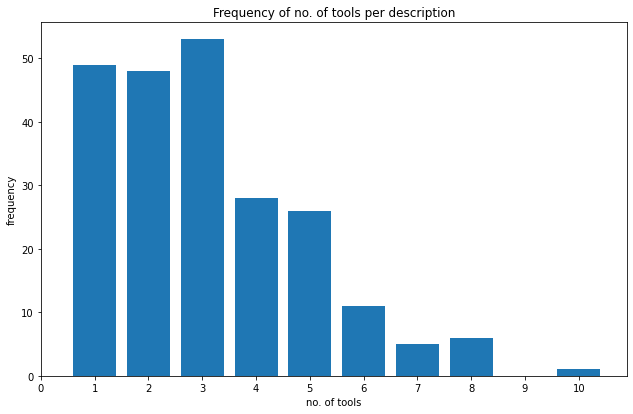

In [23]:
# Bar plot

from collections import Counter

tools_per_description_frequencies = Counter(tools_per_description.values())

fig, ax = plt.subplots()
plt.bar(tools_per_description_frequencies.keys(), tools_per_description_frequencies.values())

plt.title('Frequency of no. of tools per description')
plt.xlabel('no. of tools')
plt.ylabel('frequency')

fig.set_size_inches(10.5, 6.5)
ax.set_xticks(range(0, 11));

### Checking the percentages of jobs descriptions completely covered by each tool

In [24]:
# List of jobs descriptions mentioning one tool only
one_tool_descriptions = [desription for desription in jobs_descriptions if tools_per_description[desription] == 1]
len(one_tool_descriptions)

50

In [25]:
# Creating a dictionary of tools counts in one-tool jobs descriptions

tools_1_counts = initialize_count_dictionary()

tools_1_counts = fill_count_dictionary(tools_1_counts, one_tool_descriptions)

sorted_tools_1_counts = remove_zero_values_and_sort(tools_1_counts)
sorted_tools_1_counts

{'excel': 34, 'sql': 7, 'python': 4, 'sas': 3, 'tableau': 1, 'airtable': 1}

In [26]:
sorted_tools_1_percentages = get_tool_percentages(sorted_tools_1_counts)
sorted_tools_1_percentages

{'excel': 0.15,
 'sql': 0.03,
 'python': 0.02,
 'sas': 0.01,
 'tableau': 0.0,
 'airtable': 0.0}

<a id='Pairs'></a>
## Part III - Pairs of Tools Analysis

#### Re-creating the initialization and filling functions in order to apply them on tuples of tools

In [27]:
def initialize_count_dictionary(tools_tuples, tools_tuples_smaller):
    '''Function for initializing a dictionary of the counts of tuples of tools'''

    tools_counts = {}

    # Initializing tools tuples
    for tools_tuple in tools_tuples:
        tools_counts[tools_tuple] = 0

    # Initializing tools tuples including sql or R 
    for tools_tuple in tools_tuples_smaller:
        tools_counts[tuple(list(tools_tuple) + ['sql'])] = 0
        tools_counts[tuple(list(tools_tuple) + ['R'])] = 0
    
    return tools_counts

In [28]:
def fill_count_dictionary(tools_counts, tools_tuples, tools_tuples_smaller, jobs_descriptions):
    '''Function for filling a dictionary of the counts of tuples of tools'''

    for description in jobs_descriptions:

        # Filling the counts of tools tuples
        for tools_tuple in tools_tuples:
            flag = True
            for tool in tools_tuple:
                if tool not in description.lower():
                    flag = False
                    break
            if flag:
                tools_counts[tools_tuple] += 1

        # Filling the counts of tools tuples including sql or R 
        for tools_tuple in tools_tuples_smaller:
            flag = True
            for tool in tools_tuple:
                if tool not in description.lower():
                    flag = False
                    break
            if flag:
                if re.search(' [^a-zA-Z]?sql', description.lower()):
                    tools_counts[tuple(list(tools_tuple) + ['sql'])] += 1
                if re.search(' [^a-zA-Z0-9]?R[^a-zA-Z0-9]? ', description):
                    tools_counts[tuple(list(tools_tuple) + ['R'])] += 1

    return tools_counts

In [29]:
import itertools # for tool combinations

tools_double = list(itertools.combinations(tools, 2)) # tools pairs
tools_single = list(itertools.combinations(tools, 1))

tools_double_counts = initialize_count_dictionary(tools_double, tools_single)
tools_double_counts

{('python', 'excel'): 0,
 ('python', 'spark'): 0,
 ('python', 'hadoop'): 0,
 ('python', 'storm'): 0,
 ('python', 'tableau'): 0,
 ('python', 'qlikview'): 0,
 ('python', 'splunk'): 0,
 ('python', 'power bi'): 0,
 ('python', 'data studio'): 0,
 ('python', 'cognos'): 0,
 ('python', 'looker'): 0,
 ('python', 'qlik'): 0,
 ('python', 'domo'): 0,
 ('python', 'mysql'): 0,
 ('python', 'spss'): 0,
 ('python', 'talend'): 0,
 ('python', 'hubspot'): 0,
 ('python', 'orange'): 0,
 ('python', 'qualtrics'): 0,
 ('python', 'sas'): 0,
 ('python', 'airtable'): 0,
 ('python', 'elasticsearch'): 0,
 ('python', 'hive'): 0,
 ('python', 'data factory'): 0,
 ('python', 'pig'): 0,
 ('excel', 'spark'): 0,
 ('excel', 'hadoop'): 0,
 ('excel', 'storm'): 0,
 ('excel', 'tableau'): 0,
 ('excel', 'qlikview'): 0,
 ('excel', 'splunk'): 0,
 ('excel', 'power bi'): 0,
 ('excel', 'data studio'): 0,
 ('excel', 'cognos'): 0,
 ('excel', 'looker'): 0,
 ('excel', 'qlik'): 0,
 ('excel', 'domo'): 0,
 ('excel', 'mysql'): 0,
 ('excel', 

In [30]:
tools_double_counts = fill_count_dictionary(tools_double_counts, tools_double, tools_single, jobs_descriptions)

sorted_tools_double_counts = remove_zero_values_and_sort(tools_double_counts)
sorted_tools_double_counts

{('excel', 'sql'): 108,
 ('python', 'excel'): 68,
 ('python', 'sql'): 66,
 ('excel', 'tableau'): 60,
 ('tableau', 'sql'): 58,
 ('python', 'tableau'): 42,
 ('python', 'R'): 42,
 ('excel', 'R'): 39,
 ('excel', 'sas'): 35,
 ('sas', 'sql'): 31,
 ('excel', 'power bi'): 30,
 ('tableau', 'R'): 24,
 ('power bi', 'sql'): 24,
 ('tableau', 'power bi'): 19,
 ('tableau', 'sas'): 17,
 ('python', 'power bi'): 16,
 ('python', 'sas'): 15,
 ('power bi', 'sas'): 14,
 ('sas', 'R'): 14,
 ('power bi', 'R'): 13,
 ('python', 'mysql'): 12,
 ('looker', 'sql'): 11,
 ('excel', 'looker'): 10,
 ('excel', 'mysql'): 10,
 ('tableau', 'mysql'): 10,
 ('python', 'looker'): 9,
 ('tableau', 'looker'): 8,
 ('mysql', 'sql'): 8,
 ('excel', 'qlik'): 7,
 ('tableau', 'qlik'): 7,
 ('looker', 'R'): 7,
 ('excel', 'spss'): 6,
 ('tableau', 'data studio'): 6,
 ('spss', 'sas'): 6,
 ('hadoop', 'sql'): 6,
 ('python', 'hadoop'): 5,
 ('python', 'spss'): 5,
 ('excel', 'data studio'): 5,
 ('hadoop', 'tableau'): 5,
 ('tableau', 'spss'): 5,
 (

In [31]:
sorted_tools_double_percentages = get_tool_percentages(sorted_tools_double_counts)
sorted_tools_double_percentages

{('excel', 'sql'): 0.47,
 ('python', 'excel'): 0.3,
 ('python', 'sql'): 0.29,
 ('excel', 'tableau'): 0.26,
 ('tableau', 'sql'): 0.25,
 ('python', 'tableau'): 0.18,
 ('python', 'R'): 0.18,
 ('excel', 'R'): 0.17,
 ('excel', 'sas'): 0.15,
 ('sas', 'sql'): 0.14,
 ('excel', 'power bi'): 0.13,
 ('tableau', 'R'): 0.1,
 ('power bi', 'sql'): 0.1,
 ('tableau', 'power bi'): 0.08,
 ('tableau', 'sas'): 0.07,
 ('python', 'power bi'): 0.07,
 ('python', 'sas'): 0.07,
 ('power bi', 'sas'): 0.06,
 ('sas', 'R'): 0.06,
 ('power bi', 'R'): 0.06,
 ('python', 'mysql'): 0.05,
 ('looker', 'sql'): 0.05,
 ('excel', 'looker'): 0.04,
 ('excel', 'mysql'): 0.04,
 ('tableau', 'mysql'): 0.04,
 ('python', 'looker'): 0.04,
 ('tableau', 'looker'): 0.03,
 ('mysql', 'sql'): 0.03,
 ('excel', 'qlik'): 0.03,
 ('tableau', 'qlik'): 0.03,
 ('looker', 'R'): 0.03,
 ('excel', 'spss'): 0.03,
 ('tableau', 'data studio'): 0.03,
 ('spss', 'sas'): 0.03,
 ('hadoop', 'sql'): 0.03,
 ('python', 'hadoop'): 0.02,
 ('python', 'spss'): 0.02,
 (

In [32]:
def plot_top_tools(tools_tuples_percentages, size):
    '''Function for plotting tuples of tools appearing in more than 5% of the job descriptions'''

    top_tools_tuples = {key: value for key, value in tools_tuples_percentages.items() if value > 0.05}

    fig, ax = plt.subplots()
    plt.barh([' & '.join(set) for set in top_tools_tuples.keys()], top_tools_tuples.values())

    plt.title(size.capitalize() + 's of Data Analysis Tools appearing in more than 5% of Remote Entry Level Job Descriptions')
    plt.xlabel('% of job descriptions including the ' + size)
    plt.ylabel('tools ' + size)
    
    fig.set_size_inches(10.5, 6.5)
    x_range = range(0, int(max(list(top_tools_tuples.values()))*100)+10, 10)
    ax.set_xticks([i/100 for i in x_range])
    ax.set_xticklabels(str(i) + '%' for i in range(0, int(max(list(top_tools_tuples.values()))*100)+10, 10));

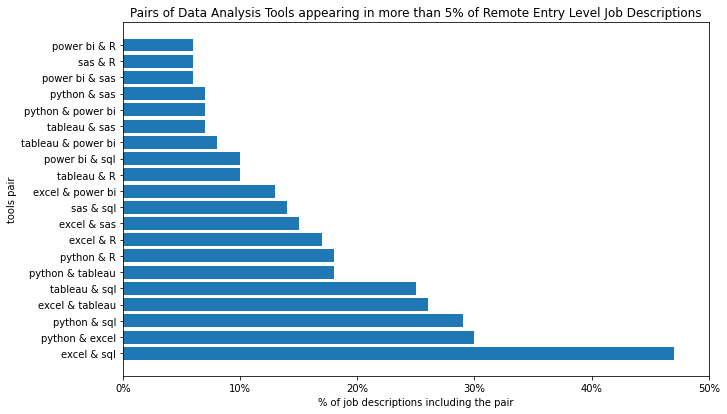

In [37]:
plot_top_tools(sorted_tools_double_percentages, 'pair')

### Checking the percentages of jobs descriptions completely covered by each tools pair

In [33]:
two_tools_descriptions = [desription for desription in jobs_descriptions if tools_per_description[desription] == 2]
len(two_tools_descriptions)

49

In [34]:
tools_2_counts = {}

# Initializing the count dictionary of tools pairs in jobs descriptions with a maximum of two tools
# with the sum of their counts in one tool descriptions
for tools_tuple in tools_double:
    tools_2_counts[tools_tuple] = tools_1_counts[tools_tuple[0]] + tools_1_counts[tools_tuple[1]]
for tool in tools:
    tools_2_counts[(tool, 'sql')] = tools_1_counts[tool] + tools_1_counts['sql']
    tools_2_counts[(tool, 'R')] = tools_1_counts[tool] + tools_1_counts['R']

tools_2_counts = fill_count_dictionary(tools_2_counts, tools_double, tools_single, two_tools_descriptions)

sorted_tools_2_counts = remove_zero_values_and_sort(tools_2_counts)
sorted_tools_2_counts

{('excel', 'sql'): 63,
 ('excel', 'sas'): 44,
 ('python', 'excel'): 43,
 ('excel', 'tableau'): 36,
 ('excel', 'power bi'): 36,
 ('excel', 'looker'): 35,
 ('excel', 'airtable'): 35,
 ('excel', 'elasticsearch'): 35,
 ('excel', 'R'): 35,
 ('excel', 'spark'): 34,
 ('excel', 'hadoop'): 34,
 ('excel', 'storm'): 34,
 ('excel', 'qlikview'): 34,
 ('excel', 'splunk'): 34,
 ('excel', 'data studio'): 34,
 ('excel', 'cognos'): 34,
 ('excel', 'qlik'): 34,
 ('excel', 'domo'): 34,
 ('excel', 'mysql'): 34,
 ('excel', 'spss'): 34,
 ('excel', 'talend'): 34,
 ('excel', 'hubspot'): 34,
 ('excel', 'orange'): 34,
 ('excel', 'qualtrics'): 34,
 ('excel', 'hive'): 34,
 ('excel', 'data factory'): 34,
 ('excel', 'pig'): 34,
 ('python', 'sql'): 14,
 ('sas', 'sql'): 10,
 ('tableau', 'sql'): 9,
 ('hadoop', 'sql'): 8,
 ('airtable', 'sql'): 8,
 ('python', 'sas'): 7,
 ('python', 'R'): 7,
 ('spark', 'sql'): 7,
 ('storm', 'sql'): 7,
 ('qlikview', 'sql'): 7,
 ('splunk', 'sql'): 7,
 ('power bi', 'sql'): 7,
 ('data studio',

In [35]:
sorted_tools_2_percentages = get_tool_percentages(sorted_tools_2_counts)
sorted_tools_2_percentages

{('excel', 'sql'): 0.28,
 ('excel', 'sas'): 0.19,
 ('python', 'excel'): 0.19,
 ('excel', 'tableau'): 0.16,
 ('excel', 'power bi'): 0.16,
 ('excel', 'looker'): 0.15,
 ('excel', 'airtable'): 0.15,
 ('excel', 'elasticsearch'): 0.15,
 ('excel', 'R'): 0.15,
 ('excel', 'spark'): 0.15,
 ('excel', 'hadoop'): 0.15,
 ('excel', 'storm'): 0.15,
 ('excel', 'qlikview'): 0.15,
 ('excel', 'splunk'): 0.15,
 ('excel', 'data studio'): 0.15,
 ('excel', 'cognos'): 0.15,
 ('excel', 'qlik'): 0.15,
 ('excel', 'domo'): 0.15,
 ('excel', 'mysql'): 0.15,
 ('excel', 'spss'): 0.15,
 ('excel', 'talend'): 0.15,
 ('excel', 'hubspot'): 0.15,
 ('excel', 'orange'): 0.15,
 ('excel', 'qualtrics'): 0.15,
 ('excel', 'hive'): 0.15,
 ('excel', 'data factory'): 0.15,
 ('excel', 'pig'): 0.15,
 ('python', 'sql'): 0.06,
 ('sas', 'sql'): 0.04,
 ('tableau', 'sql'): 0.04,
 ('hadoop', 'sql'): 0.03,
 ('airtable', 'sql'): 0.03,
 ('python', 'sas'): 0.03,
 ('python', 'R'): 0.03,
 ('spark', 'sql'): 0.03,
 ('storm', 'sql'): 0.03,
 ('qlikvie

<a id='Trios'></a>
## Part IIII - Trios of Tools Analysis

In [36]:
tools_triple = list(itertools.combinations(tools, 3)) # tools trios

In [38]:
tools_triple_counts = initialize_count_dictionary(tools_triple, tools_double)

In [39]:
tools_triple_counts = fill_count_dictionary(tools_triple_counts, tools_triple, tools_double, jobs_descriptions)

sorted_tools_triple_counts = remove_zero_values_and_sort(tools_triple_counts)
sorted_tools_triple_counts

{('python', 'excel', 'sql'): 50,
 ('excel', 'tableau', 'sql'): 48,
 ('python', 'excel', 'R'): 34,
 ('python', 'tableau', 'sql'): 34,
 ('python', 'excel', 'tableau'): 32,
 ('excel', 'sas', 'sql'): 23,
 ('python', 'tableau', 'R'): 21,
 ('excel', 'tableau', 'R'): 20,
 ('excel', 'power bi', 'sql'): 20,
 ('excel', 'tableau', 'power bi'): 16,
 ('tableau', 'power bi', 'sql'): 15,
 ('tableau', 'sas', 'sql'): 15,
 ('python', 'power bi', 'sql'): 14,
 ('python', 'sas', 'sql'): 14,
 ('python', 'excel', 'power bi'): 13,
 ('python', 'tableau', 'power bi'): 12,
 ('excel', 'tableau', 'sas'): 12,
 ('python', 'power bi', 'R'): 12,
 ('excel', 'power bi', 'sas'): 11,
 ('python', 'sas', 'R'): 11,
 ('excel', 'power bi', 'R'): 11,
 ('excel', 'sas', 'R'): 11,
 ('power bi', 'sas', 'sql'): 11,
 ('tableau', 'power bi', 'R'): 10,
 ('python', 'excel', 'mysql'): 9,
 ('python', 'excel', 'sas'): 9,
 ('python', 'tableau', 'mysql'): 9,
 ('tableau', 'power bi', 'sas'): 9,
 ('python', 'looker', 'sql'): 9,
 ('python', 'ta

In [40]:
sorted_tools_triple_percentages = get_tool_percentages(sorted_tools_triple_counts)
sorted_tools_triple_percentages

{('python', 'excel', 'sql'): 0.22,
 ('excel', 'tableau', 'sql'): 0.21,
 ('python', 'excel', 'R'): 0.15,
 ('python', 'tableau', 'sql'): 0.15,
 ('python', 'excel', 'tableau'): 0.14,
 ('excel', 'sas', 'sql'): 0.1,
 ('python', 'tableau', 'R'): 0.09,
 ('excel', 'tableau', 'R'): 0.09,
 ('excel', 'power bi', 'sql'): 0.09,
 ('excel', 'tableau', 'power bi'): 0.07,
 ('tableau', 'power bi', 'sql'): 0.07,
 ('tableau', 'sas', 'sql'): 0.07,
 ('python', 'power bi', 'sql'): 0.06,
 ('python', 'sas', 'sql'): 0.06,
 ('python', 'excel', 'power bi'): 0.06,
 ('python', 'tableau', 'power bi'): 0.05,
 ('excel', 'tableau', 'sas'): 0.05,
 ('python', 'power bi', 'R'): 0.05,
 ('excel', 'power bi', 'sas'): 0.05,
 ('python', 'sas', 'R'): 0.05,
 ('excel', 'power bi', 'R'): 0.05,
 ('excel', 'sas', 'R'): 0.05,
 ('power bi', 'sas', 'sql'): 0.05,
 ('tableau', 'power bi', 'R'): 0.04,
 ('python', 'excel', 'mysql'): 0.04,
 ('python', 'excel', 'sas'): 0.04,
 ('python', 'tableau', 'mysql'): 0.04,
 ('tableau', 'power bi', 'sa

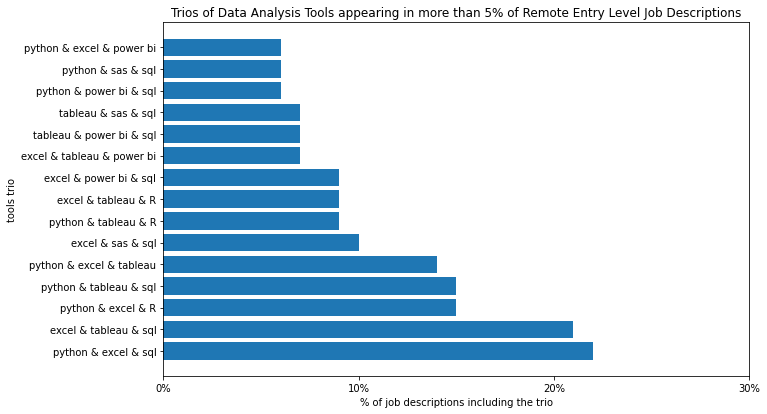

In [42]:
plot_top_tools(sorted_tools_triple_percentages, 'trio')

### Checking the percentages of jobs descriptions completely covered by each tools trio

In [41]:
three_tools_descriptions = [desription for desription in jobs_descriptions if tools_per_description[desription] == 3]
len(three_tools_descriptions)

53

In [42]:
tools_3_counts = {}

# Initializing the count dictionary of tools trios in jobs descriptions with a maximum of three tools
# with the sum of their counts in one & two tools descriptions
for tools_tuple in tools_triple:
    tools_3_counts[tools_tuple] = tools_2_counts[(tools_tuple[0], tools_tuple[1])]\
                                + (tools_2_counts[(tools_tuple[1], tools_tuple[2])]\
                                - tools_1_counts[tools_tuple[1]])\
                                + (tools_2_counts[(tools_tuple[0], tools_tuple[2])]\
                                - tools_1_counts[tools_tuple[0]]\
                                - tools_1_counts[tools_tuple[2]])
for tools_tuple in tools_double:
    tools_3_counts[(tools_tuple[0], tools_tuple[1], 'sql')] = tools_2_counts[(tools_tuple[0], tools_tuple[1])]\
                                                            + (tools_2_counts[(tools_tuple[1], 'sql')]\
                                                            - tools_1_counts[tools_tuple[1]])\
                                                            + (tools_2_counts[(tools_tuple[0], 'sql')]\
                                                            - tools_1_counts[tools_tuple[0]]\
                                                            - tools_1_counts['sql'])
    tools_3_counts[(tools_tuple[0], tools_tuple[1], 'R')] =  tools_2_counts[(tools_tuple[0], tools_tuple[1])]\
                                                            + (tools_2_counts[(tools_tuple[1], 'R')]\
                                                            - tools_1_counts[tools_tuple[1]])\
                                                            + (tools_2_counts[(tools_tuple[0], 'R')]\
                                                            - tools_1_counts[tools_tuple[0]]\
                                                            - tools_1_counts['R'])
tools_3_counts = fill_count_dictionary(tools_3_counts, tools_triple, tools_double, three_tools_descriptions)

sorted_tools_3_counts = remove_zero_values_and_sort(tools_3_counts)
sorted_tools_3_counts

{('python', 'excel', 'sql'): 82,
 ('excel', 'tableau', 'sql'): 78,
 ('excel', 'sas', 'sql'): 77,
 ('excel', 'power bi', 'sql'): 68,
 ('excel', 'spark', 'sql'): 64,
 ('excel', 'hadoop', 'sql'): 64,
 ('excel', 'looker', 'sql'): 64,
 ('excel', 'domo', 'sql'): 64,
 ('excel', 'airtable', 'sql'): 64,
 ('excel', 'elasticsearch', 'sql'): 64,
 ('excel', 'data factory', 'sql'): 64,
 ('excel', 'storm', 'sql'): 63,
 ('excel', 'qlikview', 'sql'): 63,
 ('excel', 'splunk', 'sql'): 63,
 ('excel', 'data studio', 'sql'): 63,
 ('excel', 'cognos', 'sql'): 63,
 ('excel', 'qlik', 'sql'): 63,
 ('excel', 'mysql', 'sql'): 63,
 ('excel', 'spss', 'sql'): 63,
 ('excel', 'talend', 'sql'): 63,
 ('excel', 'hubspot', 'sql'): 63,
 ('excel', 'orange', 'sql'): 63,
 ('excel', 'qualtrics', 'sql'): 63,
 ('excel', 'hive', 'sql'): 63,
 ('excel', 'pig', 'sql'): 63,
 ('python', 'excel', 'sas'): 53,
 ('python', 'excel', 'R'): 51,
 ('excel', 'power bi', 'sas'): 48,
 ('python', 'excel', 'tableau'): 46,
 ('excel', 'tableau', 'sas'

In [43]:
sorted_tools_3_percentages = get_tool_percentages(sorted_tools_3_counts)
sorted_tools_3_percentages

{('python', 'excel', 'sql'): 0.36,
 ('excel', 'tableau', 'sql'): 0.34,
 ('excel', 'sas', 'sql'): 0.34,
 ('excel', 'power bi', 'sql'): 0.3,
 ('excel', 'spark', 'sql'): 0.28,
 ('excel', 'hadoop', 'sql'): 0.28,
 ('excel', 'looker', 'sql'): 0.28,
 ('excel', 'domo', 'sql'): 0.28,
 ('excel', 'airtable', 'sql'): 0.28,
 ('excel', 'elasticsearch', 'sql'): 0.28,
 ('excel', 'data factory', 'sql'): 0.28,
 ('excel', 'storm', 'sql'): 0.28,
 ('excel', 'qlikview', 'sql'): 0.28,
 ('excel', 'splunk', 'sql'): 0.28,
 ('excel', 'data studio', 'sql'): 0.28,
 ('excel', 'cognos', 'sql'): 0.28,
 ('excel', 'qlik', 'sql'): 0.28,
 ('excel', 'mysql', 'sql'): 0.28,
 ('excel', 'spss', 'sql'): 0.28,
 ('excel', 'talend', 'sql'): 0.28,
 ('excel', 'hubspot', 'sql'): 0.28,
 ('excel', 'orange', 'sql'): 0.28,
 ('excel', 'qualtrics', 'sql'): 0.28,
 ('excel', 'hive', 'sql'): 0.28,
 ('excel', 'pig', 'sql'): 0.28,
 ('python', 'excel', 'sas'): 0.23,
 ('python', 'excel', 'R'): 0.22,
 ('excel', 'power bi', 'sas'): 0.21,
 ('python

<a id='Quadruples'></a>
## Part V - Quadruples of Tools Analysis

In [44]:
tools_quadruple = itertools.combinations(tools, 4) # tools quadruples

In [45]:
tools_quadruple_counts = initialize_count_dictionary(tools_quadruple, tools_triple)

In [46]:
tools_quadruple_counts = fill_count_dictionary(tools_quadruple_counts, tools_quadruple, tools_triple, jobs_descriptions)

sorted_tools_quadruple_counts = remove_zero_values_and_sort(tools_quadruple_counts)
sorted_tools_quadruple_counts

{('python', 'excel', 'tableau', 'sql'): 26,
 ('python', 'excel', 'tableau', 'R'): 17,
 ('excel', 'tableau', 'power bi', 'sql'): 12,
 ('python', 'excel', 'power bi', 'sql'): 11,
 ('python', 'tableau', 'power bi', 'sql'): 11,
 ('excel', 'tableau', 'sas', 'sql'): 11,
 ('python', 'excel', 'power bi', 'R'): 10,
 ('python', 'excel', 'sas', 'sql'): 9,
 ('python', 'tableau', 'power bi', 'R'): 9,
 ('python', 'excel', 'sas', 'R'): 8,
 ('excel', 'tableau', 'power bi', 'R'): 8,
 ('excel', 'power bi', 'sas', 'sql'): 8,
 ('tableau', 'power bi', 'sas', 'sql'): 8,
 ('python', 'tableau', 'sas', 'sql'): 7,
 ('python', 'excel', 'looker', 'sql'): 6,
 ('python', 'tableau', 'sas', 'R'): 6,
 ('python', 'power bi', 'sas', 'sql'): 6,
 ('excel', 'tableau', 'sas', 'R'): 6,
 ('tableau', 'power bi', 'sas', 'R'): 6,
 ('python', 'excel', 'looker', 'R'): 5,
 ('python', 'excel', 'mysql', 'sql'): 5,
 ('python', 'tableau', 'looker', 'sql'): 5,
 ('python', 'tableau', 'mysql', 'sql'): 5,
 ('python', 'power bi', 'sas', 'R'

In [47]:
sorted_tools_quadruple_percentages = get_tool_percentages(sorted_tools_quadruple_counts)
sorted_tools_quadruple_percentages

{('python', 'excel', 'tableau', 'sql'): 0.11,
 ('python', 'excel', 'tableau', 'R'): 0.07,
 ('excel', 'tableau', 'power bi', 'sql'): 0.05,
 ('python', 'excel', 'power bi', 'sql'): 0.05,
 ('python', 'tableau', 'power bi', 'sql'): 0.05,
 ('excel', 'tableau', 'sas', 'sql'): 0.05,
 ('python', 'excel', 'power bi', 'R'): 0.04,
 ('python', 'excel', 'sas', 'sql'): 0.04,
 ('python', 'tableau', 'power bi', 'R'): 0.04,
 ('python', 'excel', 'sas', 'R'): 0.03,
 ('excel', 'tableau', 'power bi', 'R'): 0.03,
 ('excel', 'power bi', 'sas', 'sql'): 0.03,
 ('tableau', 'power bi', 'sas', 'sql'): 0.03,
 ('python', 'tableau', 'sas', 'sql'): 0.03,
 ('python', 'excel', 'looker', 'sql'): 0.03,
 ('python', 'tableau', 'sas', 'R'): 0.03,
 ('python', 'power bi', 'sas', 'sql'): 0.03,
 ('excel', 'tableau', 'sas', 'R'): 0.03,
 ('tableau', 'power bi', 'sas', 'R'): 0.03,
 ('python', 'excel', 'looker', 'R'): 0.02,
 ('python', 'excel', 'mysql', 'sql'): 0.02,
 ('python', 'tableau', 'looker', 'sql'): 0.02,
 ('python', 'table

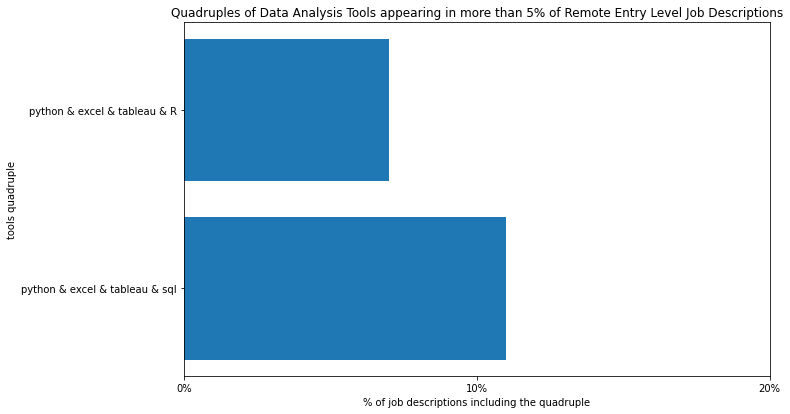

In [47]:
plot_top_tools(sorted_tools_quadruple_percentages, 'quadruple')

### Checking the percentages of jobs descriptions completely covered by each tools quadruple

In [48]:
four_tools_descriptions = [desription for desription in jobs_descriptions if tools_per_description[desription] == 4]
len(four_tools_descriptions)

28

In [49]:
tools_4_counts = {}

# Initializing the count dictionary of tools quadruples in jobs descriptions with a maximum of four tools
# with the sum of their counts in one, two & three tools descriptions
for tools_tuple in tools_quadruple:
    tools_4_counts[tools_tuple] = tools_3_counts[(tools_tuple[0], tools_tuple[1], tools_tuple[2])]\
                                + (tools_3_counts[(tools_tuple[0], tools_tuple[1], tools_tuple[3])]\
                                - tools_2_counts[(tools_tuple[0], tools_tuple[1])])\
                                + (tools_3_counts[(tools_tuple[0], tools_tuple[2], tools_tuple[3])]\
                                - tools_2_counts[(tools_tuple[0], tools_tuple[2])]\
                                - tools_1_counts[tools_tuple[3]])\
                                + (tools_3_counts[(tools_tuple[1], tools_tuple[2], tools_tuple[3])]\
                                - tools_2_counts[(tools_tuple[1], tools_tuple[3])]\
                                + tools_1_counts[tools_tuple[3]]\
                                - tools_2_counts[(tools_tuple[2], tools_tuple[3])])
for tools_tuple in tools_triple:
    tools_4_counts[(tools_tuple[0], tools_tuple[1], tools_tuple[2], 'sql')]\
        = tools_3_counts[(tools_tuple[0], tools_tuple[1], tools_tuple[2])]\
            + (tools_3_counts[(tools_tuple[0], tools_tuple[1], 'sql')]\
            - tools_2_counts[(tools_tuple[0], tools_tuple[1])])\
            + (tools_3_counts[(tools_tuple[0], tools_tuple[2], 'sql')]\
            - tools_2_counts[(tools_tuple[0], tools_tuple[2])]\
            - tools_1_counts['sql'])\
            + (tools_3_counts[(tools_tuple[1], tools_tuple[2], 'sql')]\
            - tools_2_counts[(tools_tuple[1], 'sql')]\
            + tools_1_counts['sql']\
            - tools_2_counts[(tools_tuple[2], 'sql')])
    tools_4_counts[(tools_tuple[0], tools_tuple[1], tools_tuple[2], 'R')]\
        = tools_3_counts[(tools_tuple[0], tools_tuple[1], tools_tuple[2])]\
            + (tools_3_counts[(tools_tuple[0], tools_tuple[1], 'R')]\
            - tools_2_counts[(tools_tuple[0], tools_tuple[1])])\
            + (tools_3_counts[(tools_tuple[0], tools_tuple[2], 'R')]\
            - tools_2_counts[(tools_tuple[0], tools_tuple[2])]\
            - tools_1_counts['R'])\
            + (tools_3_counts[(tools_tuple[1], tools_tuple[2], 'R')]\
            - tools_2_counts[(tools_tuple[1], 'R')]\
            + tools_1_counts['R']\
            - tools_2_counts[(tools_tuple[2], 'R')])

tools_4_counts = fill_count_dictionary(tools_4_counts, tools_quadruple, tools_triple, four_tools_descriptions)

sorted_tools_4_counts = remove_zero_values_and_sort(tools_4_counts)
sorted_tools_4_counts

{('excel', 'tableau', 'sas', 'sql'): 117,
 ('python', 'excel', 'tableau', 'sql'): 109,
 ('excel', 'power bi', 'sas', 'sql'): 109,
 ('python', 'excel', 'sas', 'sql'): 108,
 ('excel', 'tableau', 'power bi', 'sql'): 105,
 ('excel', 'tableau', 'looker', 'sql'): 102,
 ('excel', 'tableau', 'domo', 'sql'): 102,
 ('excel', 'spark', 'tableau', 'sql'): 101,
 ('excel', 'hadoop', 'tableau', 'sql'): 101,
 ('excel', 'tableau', 'airtable', 'sql'): 101,
 ('excel', 'tableau', 'elasticsearch', 'sql'): 101,
 ('excel', 'tableau', 'data factory', 'sql'): 101,
 ('excel', 'spark', 'sas', 'sql'): 100,
 ('excel', 'hadoop', 'sas', 'sql'): 100,
 ('excel', 'storm', 'tableau', 'sql'): 100,
 ('excel', 'tableau', 'qlikview', 'sql'): 100,
 ('excel', 'tableau', 'splunk', 'sql'): 100,
 ('excel', 'tableau', 'data studio', 'sql'): 100,
 ('excel', 'tableau', 'cognos', 'sql'): 100,
 ('excel', 'tableau', 'qlik', 'sql'): 100,
 ('excel', 'tableau', 'mysql', 'sql'): 100,
 ('excel', 'tableau', 'spss', 'sql'): 100,
 ('excel', 't

In [50]:
sorted_tools_4_percentages = get_tool_percentages(sorted_tools_4_counts)
sorted_tools_4_percentages

{('excel', 'tableau', 'sas', 'sql'): 0.51,
 ('python', 'excel', 'tableau', 'sql'): 0.48,
 ('excel', 'power bi', 'sas', 'sql'): 0.48,
 ('python', 'excel', 'sas', 'sql'): 0.47,
 ('excel', 'tableau', 'power bi', 'sql'): 0.46,
 ('excel', 'tableau', 'looker', 'sql'): 0.45,
 ('excel', 'tableau', 'domo', 'sql'): 0.45,
 ('excel', 'spark', 'tableau', 'sql'): 0.44,
 ('excel', 'hadoop', 'tableau', 'sql'): 0.44,
 ('excel', 'tableau', 'airtable', 'sql'): 0.44,
 ('excel', 'tableau', 'elasticsearch', 'sql'): 0.44,
 ('excel', 'tableau', 'data factory', 'sql'): 0.44,
 ('excel', 'spark', 'sas', 'sql'): 0.44,
 ('excel', 'hadoop', 'sas', 'sql'): 0.44,
 ('excel', 'storm', 'tableau', 'sql'): 0.44,
 ('excel', 'tableau', 'qlikview', 'sql'): 0.44,
 ('excel', 'tableau', 'splunk', 'sql'): 0.44,
 ('excel', 'tableau', 'data studio', 'sql'): 0.44,
 ('excel', 'tableau', 'cognos', 'sql'): 0.44,
 ('excel', 'tableau', 'qlik', 'sql'): 0.44,
 ('excel', 'tableau', 'mysql', 'sql'): 0.44,
 ('excel', 'tableau', 'spss', 'sql'

<a id='Conclusions'></a>
## Part V - Key Takeaways

The key findings from our analysis can be summarized in the following points:
- Excel seems to dominate remote entry level Data Analyst jobs with a mentioning rate of around 80%, followed up by SQL at ~60%, then Python at ~41%, Tableau at ~33%, both R & SAS at ~21%, Power BI at ~15%, then both MySQL & Looker at ~6%.
- Most remote entry level Data Analyst jobs mention 3 tools in their descriptions, with the least ones mentioning only one tool, and the highest ones mentioning ten.
- Having Excel only in your tool box may qualify you for about 15% of remote entry level Data Analyst jobs!
- Having Excel & SQL in your tool box may qualify you for about 28% of remote entry level Data Analyst jobs, while having Excel & SAS or Python for about 19%.
>Learning SQL given you are proficient in Excel may increase the range of jobs you're qualified for by ~13%.
- Having Excel, SQL & Python in your tool box may qualify you for about 36% of remote entry level Data Analyst jobs, while having Excel, SQL & SAS or Tableau for about 34%, and Excel, SQL & Power BI for about 30%.
>Learning Python, SAS or Tableau given you are proficient in Excel & SQL may increase the range of jobs you're qualified for by  about 6-8%.
- Having Excel, SQL, Tableau & SAS in your tool box may qualify you for more than half of the remote entry level Data Analyst jobs (about 51%), while having Excel, SQL, Tableau & Python or SAS & Power BI for about 48%, Excel, SQL, Python & SAS for about 47%, and Excel, SQL, Tableau & Power BI for about 46%.
>Learning Tableau given you are proficient in Excel, SQL & Python may increase the range of jobs you're qualified for by ~12%, while learning Tableau or SAS given you are proficient in Excel, SQL & one of the two my increase it by ~17%.

*And finally, lets plot the main & most important takeaway from our analysis:*

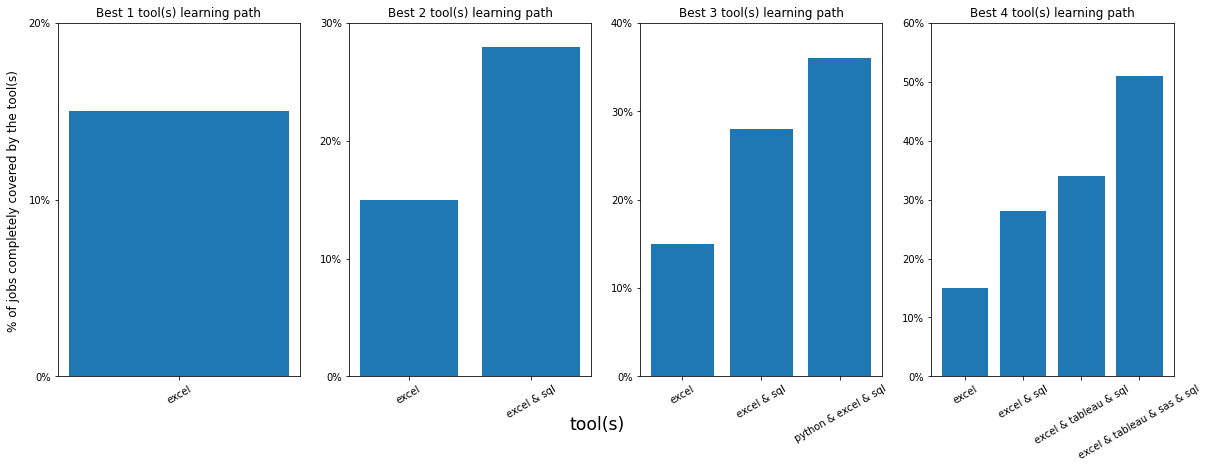

In [318]:
# Most important tools to learn -sorted by importance- for qualifying
# for most Data Analysis remote entry level jobs

# Best 1 tool learning path
plot_1_dict = {list(sorted_tools_1_percentages.keys())[0]: list(sorted_tools_1_percentages.values())[0]}
# Best 2 tools learning path
plot_2_dict = {list(sorted_tools_1_percentages.keys())[0]: list(sorted_tools_1_percentages.values())[0], \
               list(sorted_tools_2_percentages.keys())[0]: list(sorted_tools_2_percentages.values())[0]}
# Best 3 tools learning path
plot_3_dict = {list(sorted_tools_1_percentages.keys())[0]: list(sorted_tools_1_percentages.values())[0], \
               list(sorted_tools_2_percentages.keys())[0]: list(sorted_tools_2_percentages.values())[0], \
               list(sorted_tools_3_percentages.keys())[0]: list(sorted_tools_3_percentages.values())[0]}
# Best 4 tools learning path
plot_4_dict = {list(sorted_tools_1_percentages.keys())[0]: list(sorted_tools_1_percentages.values())[0], \
               list(sorted_tools_2_percentages.keys())[0]: list(sorted_tools_2_percentages.values())[0], \
               list(sorted_tools_3_percentages.keys())[1]: list(sorted_tools_3_percentages.values())[1], \
               list(sorted_tools_4_percentages.keys())[0]: list(sorted_tools_4_percentages.values())[0]}

plot_dicts = [plot_1_dict, plot_2_dict, plot_3_dict, plot_4_dict]

fig, axes = plt.subplots(1, 4)
fig.set_size_inches(20, 6.5)

i = 0
for ax in axes:
    if i == 0:
        ax.bar(plot_dicts[0].keys(), plot_dicts[0].values())
    else:
        ax.bar([list(plot_dicts[i].keys())[0]] + [' & '.join(set) for set in list(plot_dicts[i].keys())[1:]], plot_dicts[i].values())
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    
    y_range = range(0, int(max(list(plot_dicts[i].values()))*100)+10, 10)
    ax.set_yticks([i/100 for i in y_range])
    ax.set_yticklabels(str(i) + '%' for i in range(0, int(max(list(plot_dicts[i].values()))*100)+10, 10))
    ax.title.set_text('Best ' + str(i+1) + ' tool(s) learning path')

    i += 1

fig.text(0.5, 0.01, 'tool(s)', ha='center', size='xx-large')
fig.text(0.09, 0.5, '% of jobs completely covered by the tool(s)', va='center', rotation='vertical', size='large');